In [ ]:
import numpy as np
def  majority_heads_biased(n,p=0.51):
  successes=0
  for i in range(n):
    if np.random.random()>1-p:
      successes+=1
  return successes>500

print(majority_heads_biased(1000))

True


In [ ]:
from scipy.stats import binom,norm
import math

def majority_heads_binom(n,p=0.51):
    majority=math.ceil(n/2)
    return sum(binom.pmf(k,n,p) for k in range(majority,n+1))
print(majority_heads_binom(1000))

0.7467502275563255


In [ ]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


X,y=make_moons(n_samples=500,noise=0.30,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)


voting_clf=VotingClassifier(
    estimators=[
        ('lr',LogisticRegression(random_state=42)),
        ('rf',RandomForestClassifier(random_state=42)),
        ('svc',SVC(random_state=42,probability=True))
    ]
)
voting_clf.fit(X_train,y_train)
voting_clf.score(X_test,y_test)

0.912

In [ ]:
voting_clf.estimators

[('lr', LogisticRegression(random_state=42)),
 ('rf', RandomForestClassifier(random_state=42)),
 ('svc', SVC(probability=True, random_state=42))]

In [ ]:
voting_clf.estimators_ #bu modellerin kopyalari yaradilir

[LogisticRegression(random_state=42),
 RandomForestClassifier(random_state=42),
 SVC(probability=True, random_state=42)]

In [ ]:
voting_clf.named_estimators_ # list yox dict formatinda gaytarir

{'lr': LogisticRegression(random_state=42),
 'rf': RandomForestClassifier(random_state=42),
 'svc': SVC(probability=True, random_state=42)}

In [ ]:
for name,clf in voting_clf.named_estimators_.items():
  print(name,clf.score(X_test,y_test))

lr 0.864
rf 0.896
svc 0.896


In [ ]:
voting_clf.predict(X_test[:1])

array([1])

In [ ]:
[estimator.predict(X_test[:1]) for estimator in voting_clf.estimators_]

[array([1]), array([1]), array([0])]

In [ ]:
#hard voting regemlre baxir,soft voting ise eminlike baxir.1cisi ucun  probability lazimdi ancag csv lerde prob baxmag olmur dye elave parametr etdik =tru

In [ ]:
voting_clf.voting='soft'
voting_clf.score(X_test,y_test)
#adeten soft daha yaxsi netice gaytarir

0.92

#Bagging and Pasting

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,
                        max_samples=100,bootstrap=True,n_jobs=-1)

bag_clf.fit(X_train,y_train)
bag_clf.score(X_test,y_test)

0.904

In [ ]:
tree_clf=DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
tree_clf.score(X_test,y_test)

0.888

#00B evaluation->Out of bag evaluation

In [ ]:
bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,
                          bootstrap=True,n_jobs=-1,oob_score=True)

bag_clf.fit(X_train,y_train)
bag_clf.score(X_test,y_test)

0.904

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,
                               n_jobs=-1,random_state=42)

rnd_clf.fit(X_train,y_train)
rnd_clf.score(X_test,y_test)

0.912

In [ ]:
#Subspaces->Random Features,Subpatches->Random Features+Random Instances

In [ ]:
bag_clf=BaggingClassifier(DecisionTreeClassifier(max_features='sqrt',
                                                 max_leaf_nodes=16,
                                                 splitter='best'),
                          n_estimators=500,random_state=42)
bag_clf.fit(X_train,y_train)
bag_clf.score(X_test,y_test)

0.912

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ext_clf=ExtraTreesClassifier(n_estimators=500,max_leaf_nodes=16,
                             n_jobs=-1,random_state=42)
ext_clf.fit(X_train,y_train)
ext_clf.score(X_test,y_test)


0.912

#Feature Importance

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
rnd_clf=RandomForestClassifier(n_estimators=500,n_jobs=-1,random_state=42)
rnd_clf.fit(iris['data'],iris['target'])
for name,score in zip(iris['feature_names'],rnd_clf.feature_importances_):
  print(name,score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


#Boosting

Adaboosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                              n_estimators=200,
                              learning_rate=0.5,random_state=42)

ada_clf.fit(X_train,y_train)
ada_clf.score(X_test,y_test)


0.896

# GradientBoosting

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
np.random.seed(42)
X=np.random.rand(100,1)-0.5
y=3*X[:,0]**2+0.05*np.random.randn(100)

tree_reg1=DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg1.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
tree_reg2=DecisionTreeRegressor(max_depth=2,random_state=42)
y2=y-tree_reg1.predict(X)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
tree_reg3=DecisionTreeRegressor(max_depth=2,random_state=42)
y3=y-tree_reg2.predict(X)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt=GradientBoostingRegressor(max_depth=2,n_estimators=3,
                               learning_rate=1.0,random_state=42)
gbrt.fit(X,y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [ ]:
gbrt_best=GradientBoostingRegressor(
    max_depth=2,learning_rate=0.05,n_estimators=500,
    n_iter_no_change=10,random_state=42
)
gbrt_best.fit(X,y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          n_iter_no_change=10, random_state=42)

In [ ]:
gbrt_best.n_estimators_

92

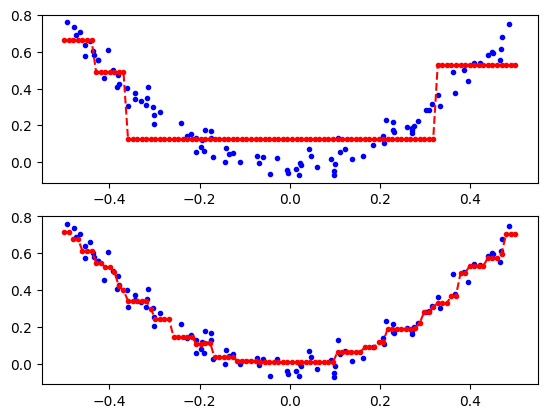

In [ ]:
tree_reg=DecisionTreeRegressor(max_depth=2,random_state=42)
import matplotlib.pyplot as plt
X_new=np.linspace(-0.5,0.5,100).reshape(-1,1)
tree_reg.fit(X,y)

plt.subplot(211)
plt.plot(X,y,'b.')
plt.plot(X_new,tree_reg.predict(X_new),'r.--')

plt.subplot(212)
plt.plot(X,y,'b.')
plt.plot(X_new,gbrt_best.predict(X_new),'r.--')
plt.show()

#Exstra Gradient Boosting

In [ ]:
from xgboost import XGBRegressor
xgb_reg=XGBRegressor(random_state=42)
xgb_reg.fit(X,y)
xgb_reg.score(X,y)

0.9998913626632905

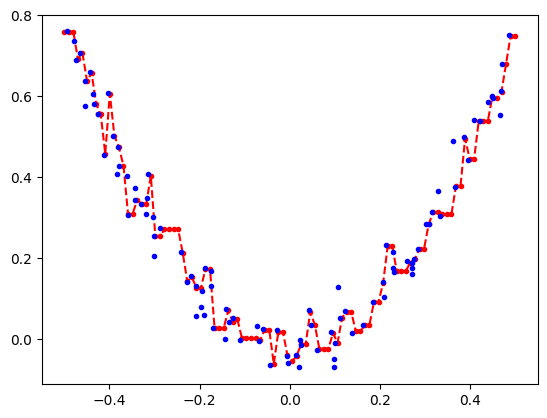

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X_new,xgb_reg.predict(X_new),'r.--')
plt.plot(X,y,'b.')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

stack_clf=StackingClassifier(
    estimators=[
        ('lr',LogisticRegression(random_state=42)),
        ('rf',RandomForestClassifier(random_state=42)),
        ('svc',SVC(random_state=42,probability=True))
    ],
    final_estimator=RandomForestClassifier(random_state=42)
)
stack_clf.fit(X_train,y_train)
stack_clf.score(X_test,y_test)

0.912

In [ ]:
import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))   # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi   # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles)*5   # oval
X += 0.28 * np.random.randn(m, 3)   # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]   # shift a bit

In [ ]:
X.shape

(60, 3)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
X2D[:3]

array([[ 1.12029519, -0.86954602],
       [-4.659103  ,  0.14655299],
       [ 2.54392638,  1.35399279]])

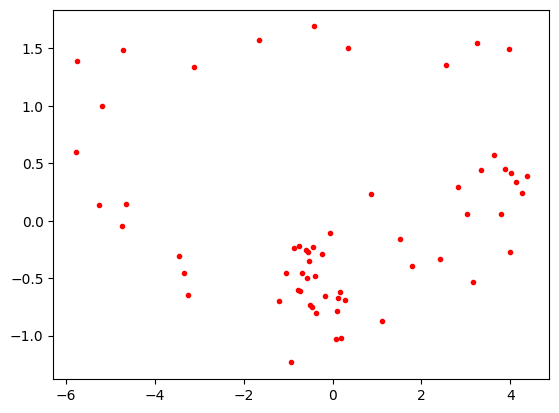

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X2D[:, 0], X2D[:, 1], 'r.');

In [ ]:
pca.explained_variance_ratio_ #varianceleri gosterir,yeni secilmis esas 2 sutun nece faiz melumati ozunde saxlayir

array([0.92067885, 0.0709305 ])

In [ ]:
1 - pca.explained_variance_ratio_.sum() #itirdiyimiz data sayini gaytarir

0.008390657880442687

# Choosing the right number of Dimensions

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

X_train.shape

(60000, 784)

In [ ]:
pca = PCA()
pca.fit(X_train)
pca.explained_variance_ratio_

array([9.70466436e-02, 7.09592406e-02, 6.16908876e-02, 5.38941949e-02,
       4.86879702e-02, 4.31223132e-02, 3.27192995e-02, 2.88389545e-02,
       2.76202940e-02, 2.35700055e-02, 2.10918962e-02, 2.02299108e-02,
       1.71581820e-02, 1.69211143e-02, 1.57864128e-02, 1.48295261e-02,
       1.32456095e-02, 1.27689737e-02, 1.18726294e-02, 1.15268370e-02,
       1.06616621e-02, 1.00671337e-02, 9.53573327e-03, 9.12543746e-03,
       8.83404692e-03, 8.39319141e-03, 8.12578809e-03, 7.86366084e-03,
       7.44733102e-03, 6.90859128e-03, 6.58093773e-03, 6.48147870e-03,
       6.02615030e-03, 5.86582188e-03, 5.70021474e-03, 5.43627771e-03,
       5.05786416e-03, 4.87858604e-03, 4.81429342e-03, 4.72266326e-03,
       4.56746921e-03, 4.44836012e-03, 4.18501329e-03, 3.98215339e-03,
       3.84974607e-03, 3.75103387e-03, 3.62008852e-03, 3.51591277e-03,
       3.40058205e-03, 3.21874467e-03, 3.19017051e-03, 3.12804939e-03,
       2.95982668e-03, 2.88954600e-03, 2.84130398e-03, 2.71435811e-03,
      

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09704664, 0.16800588, 0.22969677, 0.28359097, 0.33227894,
       0.37540125, 0.40812055, 0.4369595 , 0.4645798 , 0.4881498 ,
       0.5092417 , 0.52947161, 0.54662979, 0.56355091, 0.57933732,
       0.59416685, 0.60741246, 0.62018143, 0.63205406, 0.6435809 ,
       0.65424256, 0.66430969, 0.67384542, 0.68297086, 0.69180491,
       0.7001981 , 0.70832389, 0.71618755, 0.72363488, 0.73054347,
       0.73712441, 0.74360589, 0.74963204, 0.75549786, 0.76119807,
       0.76663435, 0.77169222, 0.7765708 , 0.7813851 , 0.78610776,
       0.79067523, 0.79512359, 0.7993086 , 0.80329076, 0.8071405 ,
       0.81089154, 0.81451162, 0.81802754, 0.82142812, 0.82464686,
       0.82783703, 0.83096508, 0.83392491, 0.83681446, 0.83965576,
       0.84237012, 0.84506533, 0.84765006, 0.85018776, 0.85263557,
       0.85504063, 0.85743326, 0.85973735, 0.86195267, 0.86408988,
       0.86616213, 0.86819256, 0.87016038, 0.87208891, 0.87397523,
       0.875845  , 0.87765583, 0.87943146, 0.88118044, 0.88283

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

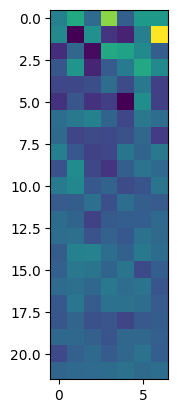

In [ ]:
plt.imshow(X_reduced[0].reshape(22, 7))

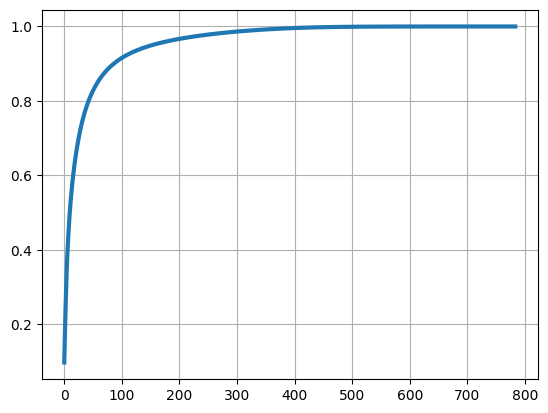

In [ ]:
plt.plot(cumsum, linewidth=3)
plt.grid();

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(PCA(random_state=42),
                    RandomForestClassifier(random_state=42))

params = {
    'pca__n_components': np.arange(10, 80),
    'randomforestclassifier__n_estimators': np.arange(50, 500)
}

rnd_search = RandomizedSearchCV(clf, params, n_iter=10, cv=3, random_state=42)
rnd_search.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [ ]:
rnd_search.best_params_

{'randomforestclassifier__n_estimators': 475, 'pca__n_components': 57}

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches=100
inc_pca = IncrementalPCA(n_components=154)

for X_batch in np.array_split(X_train, n_batches):
  inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.fit_transform(X_train)

# Locally Linear Embedding

In [ ]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X_swiss)

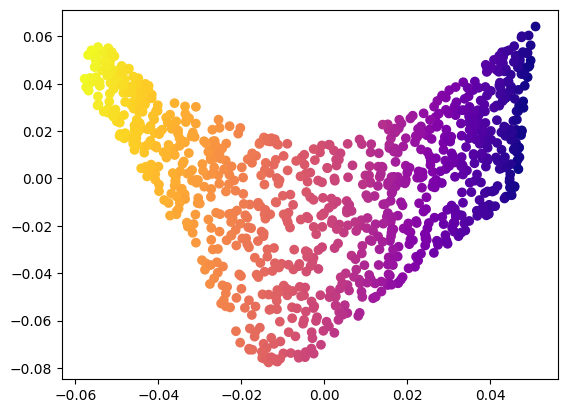

In [ ]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap='plasma');

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X_swiss)

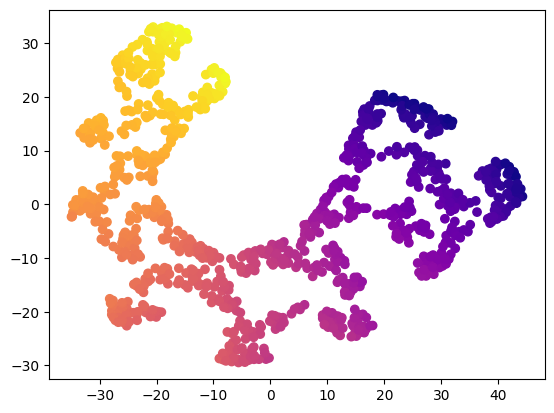

In [ ]:
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=t, cmap='plasma');